# Import Required Libraries

In [7]:
# Section 0: Import Required Libraries

# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Save model
import joblib

# Plotting settings
sns.set_theme(style="whitegrid")   # modern seaborn theme
sns.set_palette("coolwarm")        # custom color palette
plt.rcParams["figure.figsize"] = (8, 5)  # default figure size


# Section 1: Raw Data Reading & Complete Visualization

Here, we will:

* Load the dataset.

* Show basic info (rows, columns, types).

* Look at missing values.

* Visualize the raw data using multiple plots (histograms, boxplots, scatter, pairplots, heatmaps).

In [8]:
# Section 1: Raw Data Reading & Complete Visualization

# Load dataset
df = pd.read_csv("House Price India.csv")

# Basic Info
print("Shape of dataset:", df.shape)
print("\nData Types & Null Values:")
print(df.info())
print("\nMissing values in each column:\n", df.isnull().sum())

# First 5 rows
df.head()


Shape of dataset: (14619, 23)

Data Types & Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the 

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


### 🔹 Visualization of Raw Data

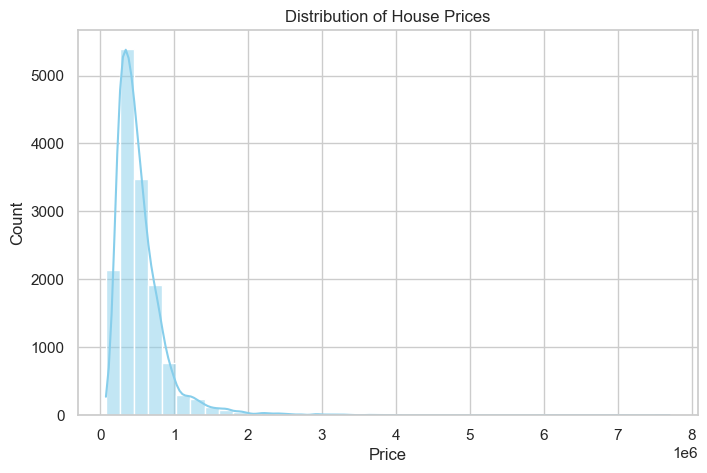

C:\Users\kamoo\AppData\Local\Temp\ipykernel_19320\891420299.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bathroom_cat", y="Price", data=df, palette="viridis")


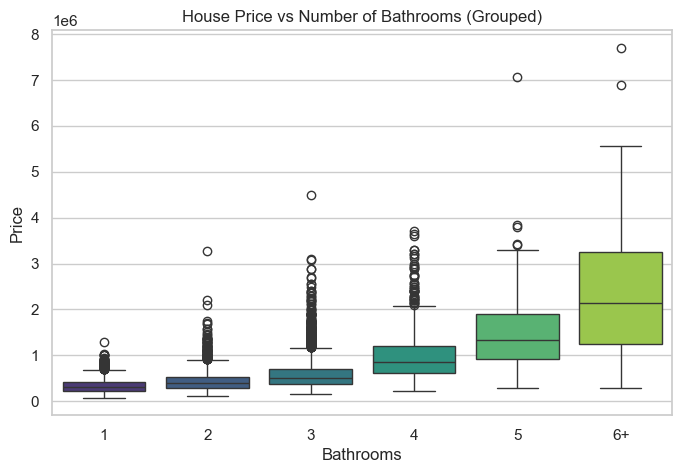

C:\Users\kamoo\AppData\Local\Temp\ipykernel_19320\891420299.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bedroom_cat", y="Price", data=df, palette="viridis")


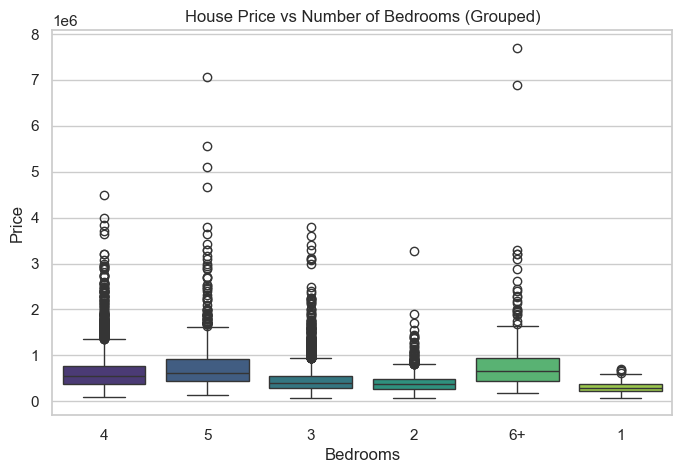

C:\Users\kamoo\AppData\Local\Temp\ipykernel_19320\891420299.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="condition of the house", y="Price", data=df, palette="coolwarm")


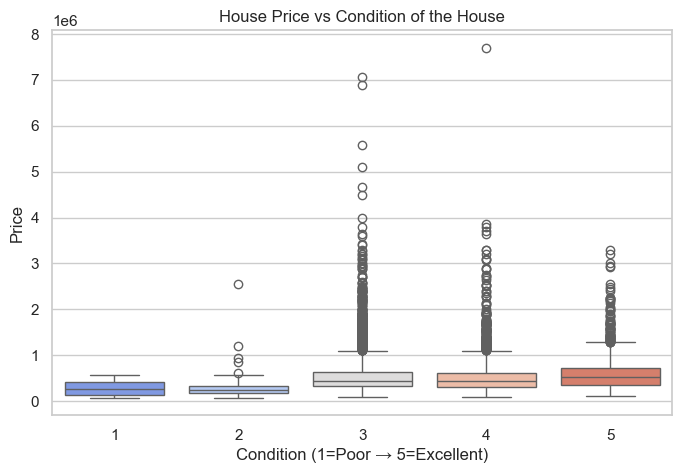

C:\Users\kamoo\AppData\Local\Temp\ipykernel_19320\891420299.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="grade of the house", y="Price", data=df, palette="plasma")


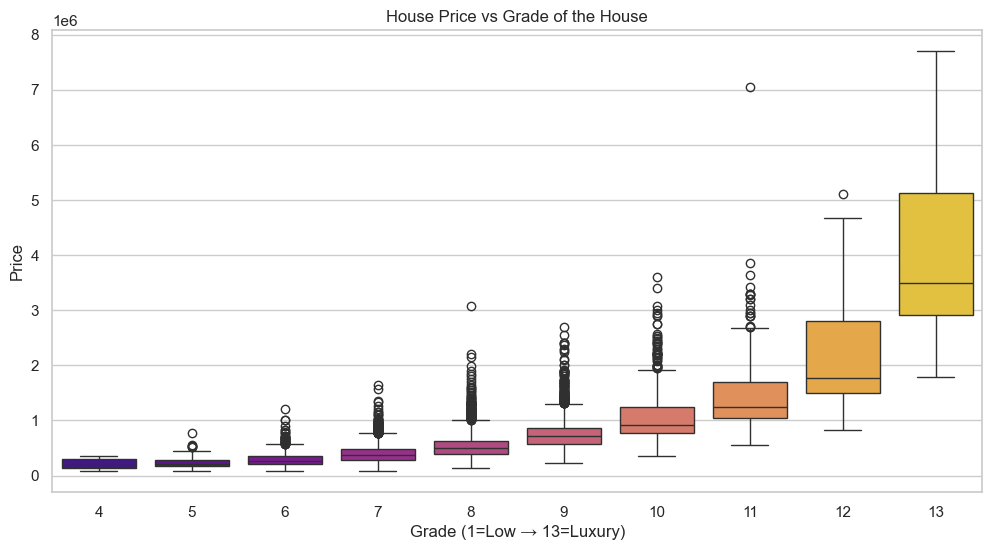

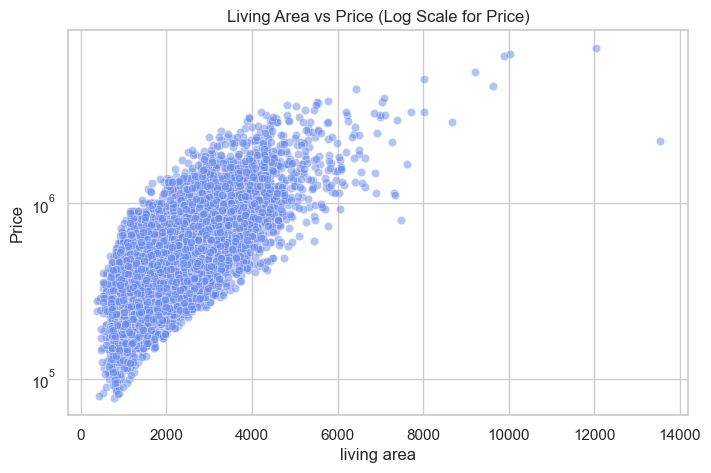

C:\Users\kamoo\AppData\Local\Temp\ipykernel_19320\891420299.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="magma")


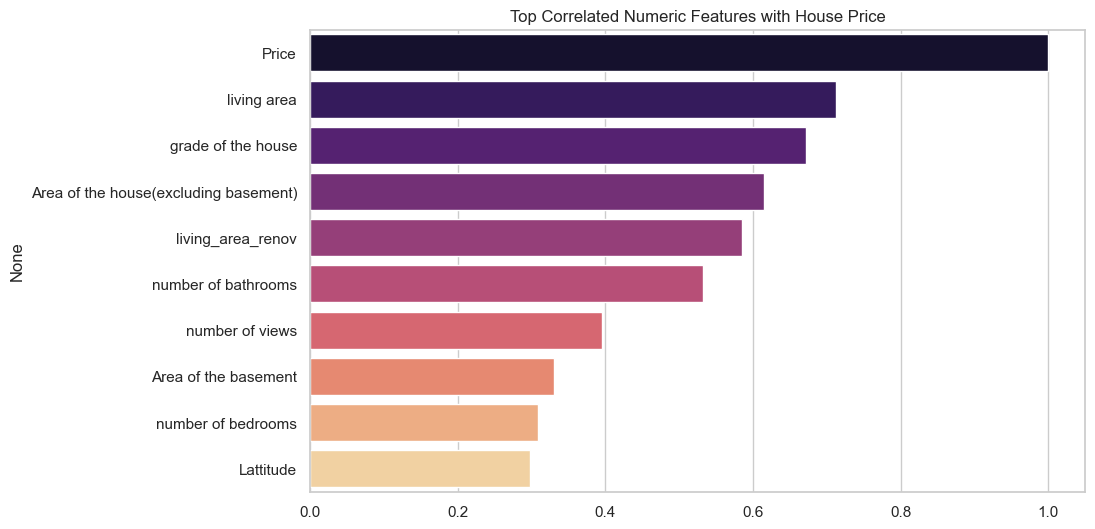

In [9]:
# 1. Distribution of target (Price)
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=40, kde=True, color="skyblue")
plt.title("Distribution of House Prices")
plt.show()

# -------------------------------
# Grouped Boxplots (Better Interpretation)
# -------------------------------

# Bathrooms (grouped)
df["bathroom_cat"] = pd.cut(df["number of bathrooms"], 
                            bins=[0,1,2,3,4,5,10], 
                            labels=["1","2","3","4","5","6+"])
plt.figure(figsize=(8,5))
sns.boxplot(x="bathroom_cat", y="Price", data=df, palette="viridis")
plt.title("House Price vs Number of Bathrooms (Grouped)")
plt.xlabel("Bathrooms")
plt.show()

# Bedrooms (grouped)
df["bedroom_cat"] = df["number of bedrooms"].apply(lambda x: x if x < 6 else "6+")
plt.figure(figsize=(8,5))
sns.boxplot(x="bedroom_cat", y="Price", data=df, palette="viridis")
plt.title("House Price vs Number of Bedrooms (Grouped)")
plt.xlabel("Bedrooms")
plt.show()

# Condition of House (1=Poor ... 5=Excellent)
plt.figure(figsize=(8,5))
sns.boxplot(x="condition of the house", y="Price", data=df, palette="coolwarm")
plt.title("House Price vs Condition of the House")
plt.xlabel("Condition (1=Poor → 5=Excellent)")
plt.show()

# Grade of House (1=Low quality ... 13=High quality)
plt.figure(figsize=(12,6))
sns.boxplot(x="grade of the house", y="Price", data=df, palette="plasma")
plt.title("House Price vs Grade of the House")
plt.xlabel("Grade (1=Low → 13=Luxury)")
plt.show()

# Living Area vs Price (scatter with log-scale for clarity)
plt.figure(figsize=(8,5))
sns.scatterplot(x="living area", y="Price", data=df, alpha=0.5)
plt.yscale("log")
plt.title("Living Area vs Price (Log Scale for Price)")
plt.show()


# Correlation with Price (Top 10 features)
plt.figure(figsize=(10,6))
# keep only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()["Price"].sort_values(ascending=False).head(10)
sns.barplot(x=corr.values, y=corr.index, palette="magma")
plt.title("Top Correlated Numeric Features with House Price")
plt.show()


# Section 2: EDA (Feature Engineering + Outlier Analysis + Target Transformation)

* Here, we’ll go beyond raw visualization and actually analyze:

* Target variable (Price) distribution & skew → maybe apply log-transform.

* Feature engineering → house age, renovation indicator.

* Outlier detection → scatterplots of living area & lot area vs Price.

Insights: show how engineered features correlate with Price.

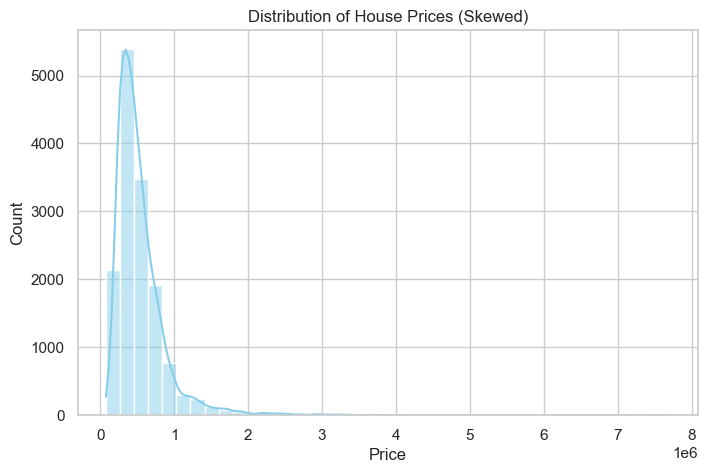

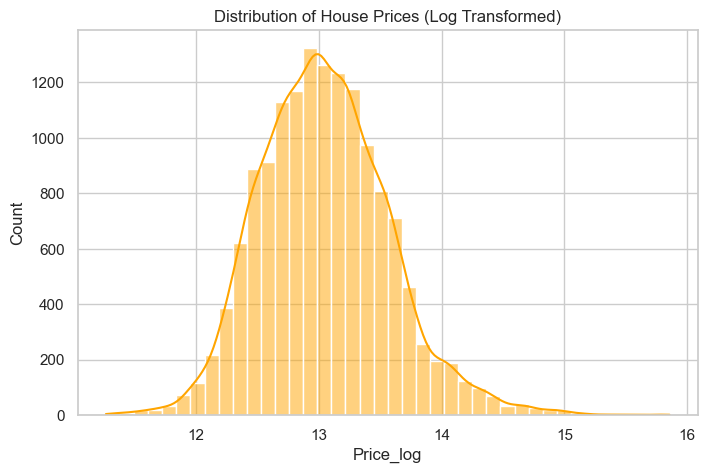

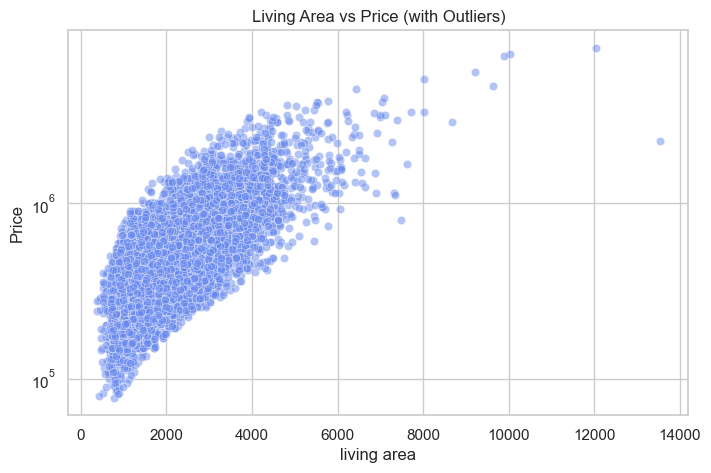

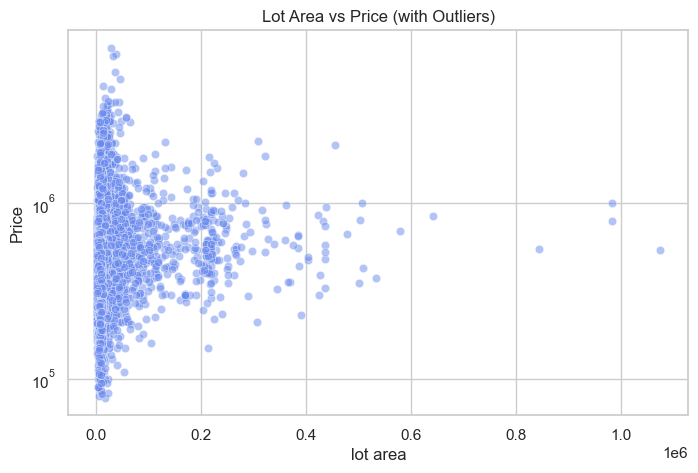

C:\Users\kamoo\AppData\Local\Temp\ipykernel_19320\81451534.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


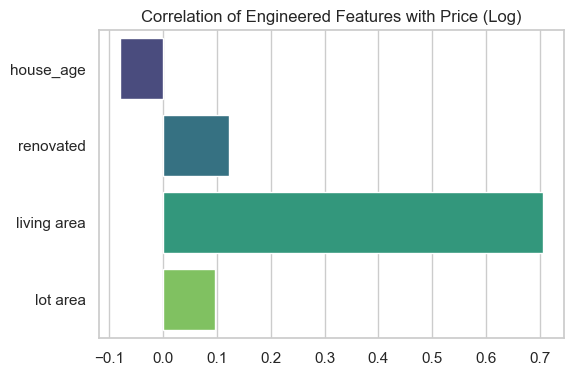

In [10]:
# Section 2: EDA (Feature Engineering + Outlier Analysis + Target Transformation)

# ---------------------------
# 1. Target Variable Distribution
# ---------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=40, kde=True, color="skyblue")
plt.title("Distribution of House Prices (Skewed)")
plt.show()

# Log-transform target (to reduce skewness)
df["Price_log"] = np.log1p(df["Price"])  # log(Price+1)

plt.figure(figsize=(8,5))
sns.histplot(df["Price_log"], bins=40, kde=True, color="orange")
plt.title("Distribution of House Prices (Log Transformed)")
plt.show()


# ---------------------------
# 2. Feature Engineering
# ---------------------------

# House age
df["house_age"] = 2025 - df["Built Year"]

# Renovated or not
df["renovated"] = df["Renovation Year"].apply(lambda x: 0 if x == 0 else 1)

# Drop old columns if not needed
# (We will keep original Built Year for now just for EDA)
# df = df.drop(["Built Year", "Renovation Year"], axis=1)


# ---------------------------
# 3. Outlier Detection
# ---------------------------

# Living area vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="living area", y="Price", data=df, alpha=0.5)
plt.yscale("log")
plt.title("Living Area vs Price (with Outliers)")
plt.show()

# Lot area vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="lot area", y="Price", data=df, alpha=0.5)
plt.yscale("log")
plt.title("Lot Area vs Price (with Outliers)")
plt.show()


# ---------------------------
# 4. Correlation of Engineered Features
# ---------------------------
plt.figure(figsize=(6,4))
sns.barplot(
    x=df[["house_age","renovated","living area","lot area"]].corrwith(df["Price_log"]).values,
    y=["house_age","renovated","living area","lot area"],
    palette="viridis"
)
plt.title("Correlation of Engineered Features with Price (Log)")
plt.show()


# Section 3: Preprocessing (with Visualization)

In this section we’ll:

* Drop unnecessary columns (id, Date, Postal Code, raw years, etc.).

* Keep engineered features (house_age, renovated, Price_log).

* Handle categorical variables (bathroom_cat, bedroom_cat if we want, else drop them).

* Scale numerical features.

* Show before/after scaling distribution (so you can see normalization effect).

Remaining columns: ['number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price_log', 'house_age', 'renovated']
Scaled Feature Sample:
   number of bedrooms  number of bathrooms  living area  lot area  \
0            0.661360             0.481139     0.885428 -0.292558   
1            1.726750             0.805845     0.874655 -0.148042   
2            0.661360             0.481139     1.305602  0.735881   
3           -0.404031            -0.168272     0.659181 -0.279373   
4           -0.404031             0.481139     0.540670 -0.272780   

   number of floors  waterfront present  number of views  \
0         -0.004305           -0.087866        -0.304128   
1         -0.00

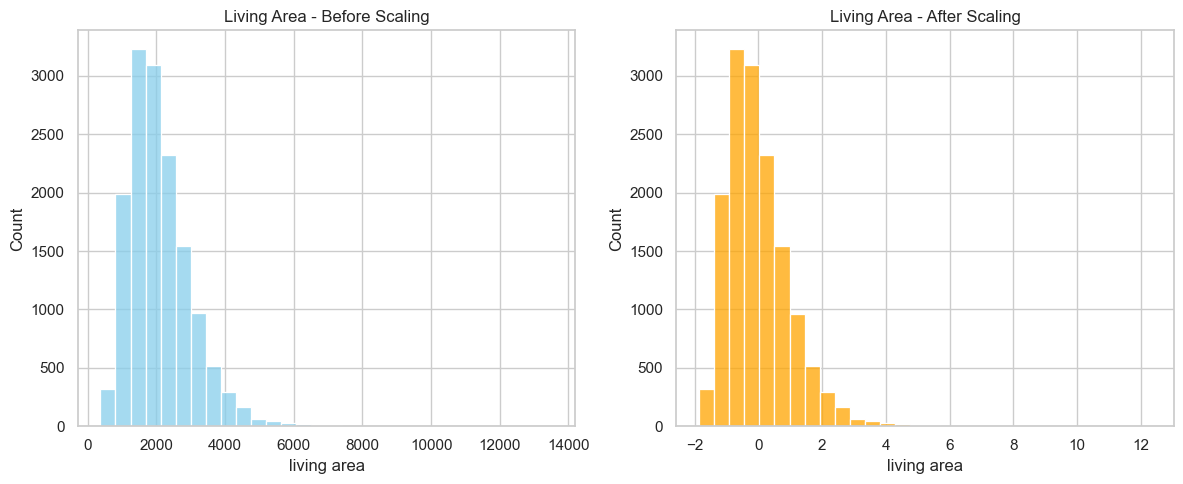

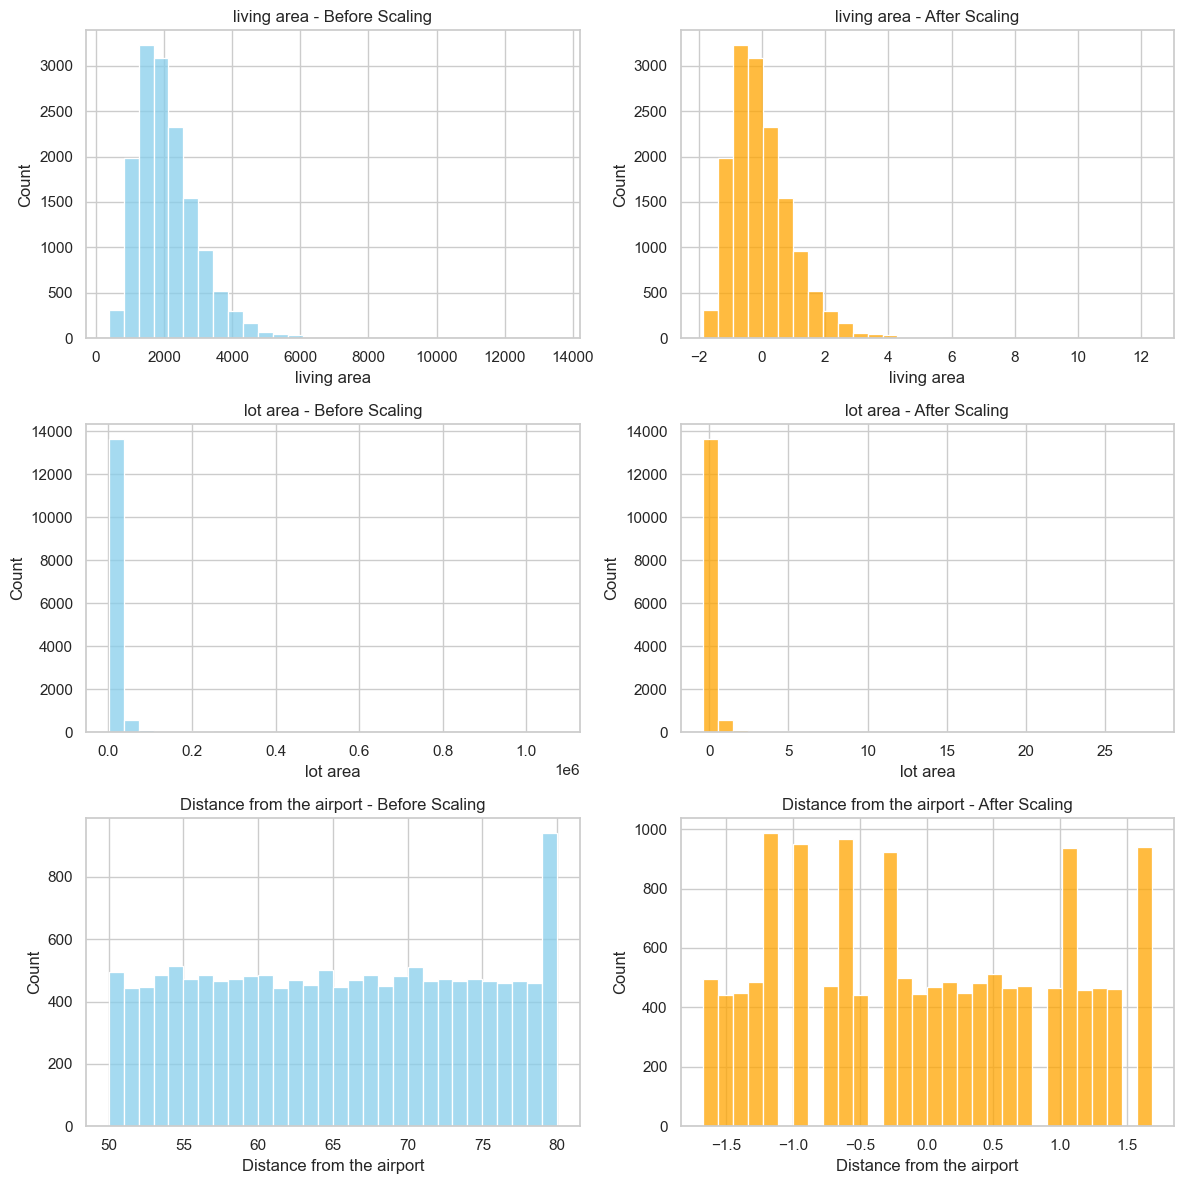

In [11]:
# Section 3: Preprocessing

# ---------------------------
# 1. Drop irrelevant columns
# ---------------------------
df_processed = df.copy()

drop_cols = ["id", "Date", "Postal Code", "Price", "Built Year", "Renovation Year",
             "bathroom_cat", "bedroom_cat"]  # drop engineered categorical bins (not numeric)
df_processed = df_processed.drop(columns=drop_cols, errors="ignore")

print("Remaining columns:", df_processed.columns.tolist())


# ---------------------------
# 2. Separate features and target
# ---------------------------
X = df_processed.drop("Price_log", axis=1)
y = df_processed["Price_log"]   # we will predict log-price


# ---------------------------
# 3. Scale numerical features
# ---------------------------
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

print("Scaled Feature Sample:")
print(X_scaled.head())


# ---------------------------
# 4. Visualize scaling effect
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(X[numeric_features]["living area"], bins=30, ax=axes[0], color="skyblue")
axes[0].set_title("Living Area - Before Scaling")

sns.histplot(X_scaled[numeric_features]["living area"], bins=30, ax=axes[1], color="orange")
axes[1].set_title("Living Area - After Scaling")

plt.tight_layout()
plt.show()

# Visualize scaling effect for multiple features
features_to_check = ["living area", "lot area", "Distance from the airport"]

fig, axes = plt.subplots(len(features_to_check), 2, figsize=(12, 4*len(features_to_check)))

for i, feature in enumerate(features_to_check):
    sns.histplot(X[feature], bins=30, ax=axes[i,0], color="skyblue")
    axes[i,0].set_title(f"{feature} - Before Scaling")

    sns.histplot(X_scaled[feature], bins=30, ax=axes[i,1], color="orange")
    axes[i,1].set_title(f"{feature} - After Scaling")

plt.tight_layout()
plt.show()



# Section 4: Train–Validation–Test Split (70–15–15)

Here, we’ll split the data into:

70% Training set → to train the models.

15% Validation set → to tune hyperparameters & compare models.

15% Test set → to report final unbiased performance.

We’ll also visualize the split sizes.

Train size: (10233, 19)
Validation size: (2193, 19)
Test size: (2193, 19)


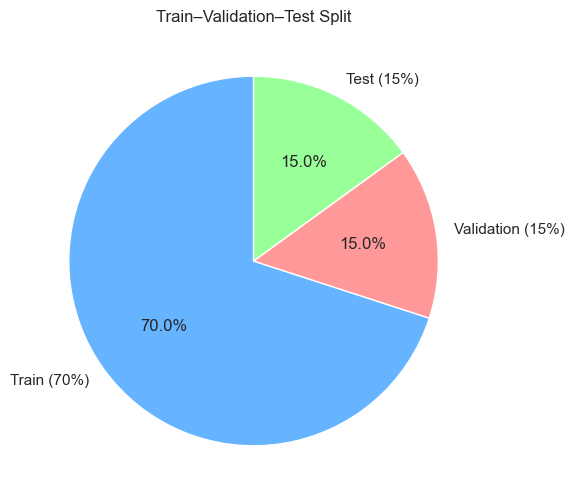

In [12]:
# Section 4: Train–Validation–Test Split (70–15–15)

from sklearn.model_selection import train_test_split

# First split: Train (70%) + Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Second split: Validation (15%) + Test (15%) from Temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

# ---------------------------
# Visualize dataset split sizes
# ---------------------------
sizes = [len(X_train), len(X_val), len(X_test)]
labels = ["Train (70%)", "Validation (15%)", "Test (15%)"]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=["#66b3ff","#ff9999","#99ff99"])
plt.title("Train–Validation–Test Split")
plt.show()


# Section 5: Model Training + Validation Performance (with Comparison)

Here we’ll:

Train 3 models:

Linear Regression (baseline)

Random Forest

Gradient Boosting

Evaluate on Validation Set (15%).

Compare results visually (bar charts of R², MAE, RMSE).

In [13]:
# Section 5: Model Training + Validation + Test Performance

def evaluate_model(name, model, X_tr, y_tr, X_val, y_val, X_te, y_te):
    """Train model and evaluate on train, val, test sets"""
    
    # Train
    model.fit(X_tr, y_tr)
    
    # Predictions
    y_pred_train = model.predict(X_tr)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_te)
    
    # Metrics
    results = {
        "Train_R2": r2_score(y_tr, y_pred_train),
        "Val_R2": r2_score(y_val, y_pred_val),
        "Test_R2": r2_score(y_te, y_pred_test),
        "Train_RMSE": np.sqrt(mean_squared_error(y_tr, y_pred_train)),
        "Val_RMSE": np.sqrt(mean_squared_error(y_val, y_pred_val)),
        "Test_RMSE": np.sqrt(mean_squared_error(y_te, y_pred_test))
    }
    return results

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1)
}

# Evaluate all
all_results = {}
for name, model in models.items():
    all_results[name] = evaluate_model(name, model, X_train, y_train, X_val, y_val, X_test, y_test)

results_df = pd.DataFrame(all_results).T
print(results_df)


                   Train_R2    Val_R2   Test_R2  Train_RMSE  Val_RMSE  \
Linear Regression  0.778150  0.775853  0.782259    0.246510  0.254417   
Random Forest      0.984777  0.896454  0.890101    0.064574  0.172921   
Gradient Boosting  0.916212  0.898501  0.889444    0.151495  0.171203   

                   Test_RMSE  
Linear Regression   0.244903  
Random Forest       0.173989  
Gradient Boosting   0.174508  


<Figure size 1000x600 with 0 Axes>

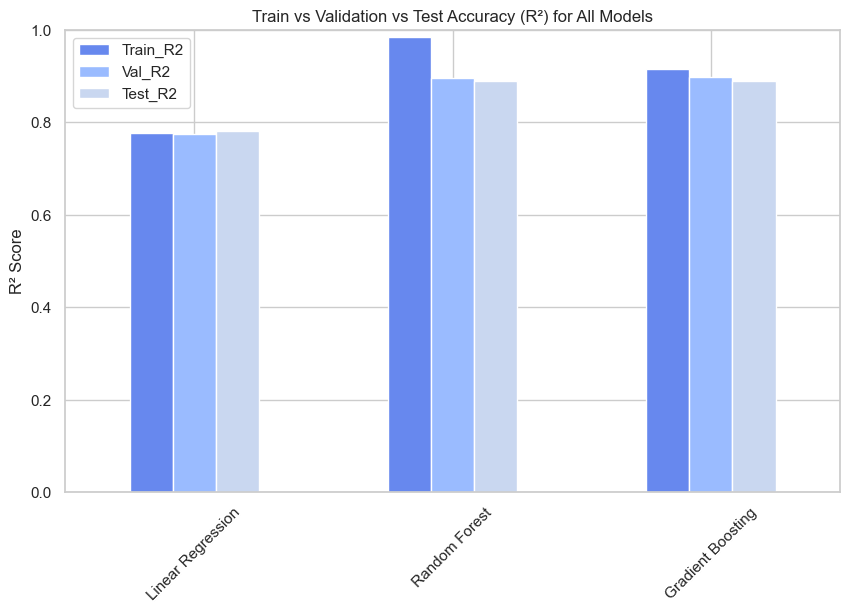

<Figure size 1000x600 with 0 Axes>

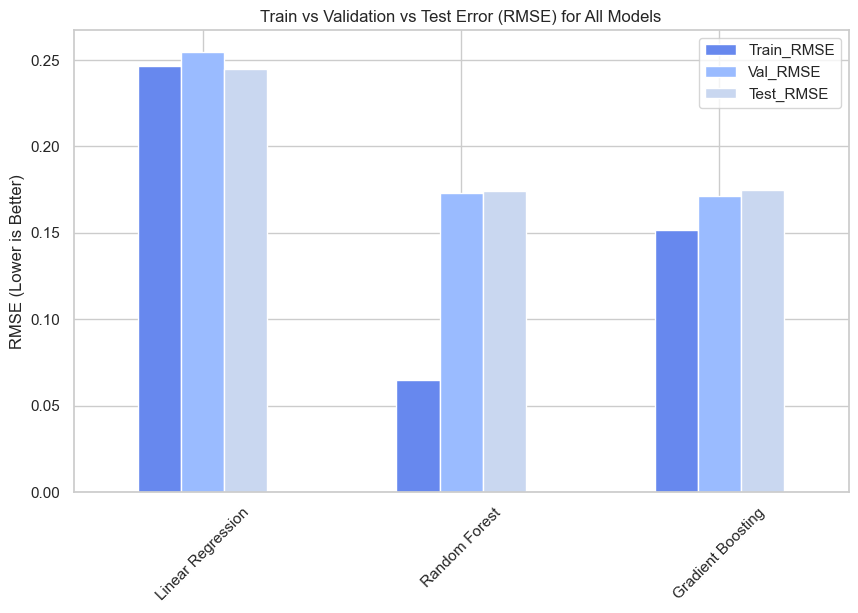

In [14]:
# Combined R² comparison for Train, Validation, Test
plt.figure(figsize=(10,6))
results_df[["Train_R2","Val_R2","Test_R2"]].plot(kind="bar", figsize=(10,6))
plt.title("Train vs Validation vs Test Accuracy (R²) for All Models")
plt.ylabel("R² Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

# Combined RMSE comparison
plt.figure(figsize=(10,6))
results_df[["Train_RMSE","Val_RMSE","Test_RMSE"]].plot(kind="bar", figsize=(10,6))
plt.title("Train vs Validation vs Test Error (RMSE) for All Models")
plt.ylabel("RMSE (Lower is Better)")
plt.xticks(rotation=45)
plt.show()


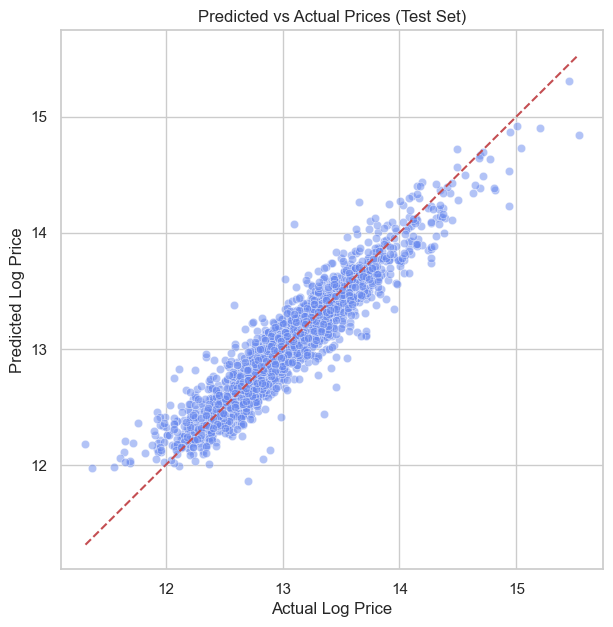

In [15]:
# Predicted vs Actual Prices for Best Model (Gradient Boosting)
best_model = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1)
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # perfect fit line
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Predicted vs Actual Prices (Test Set)")
plt.show()


<Figure size 1000x600 with 0 Axes>

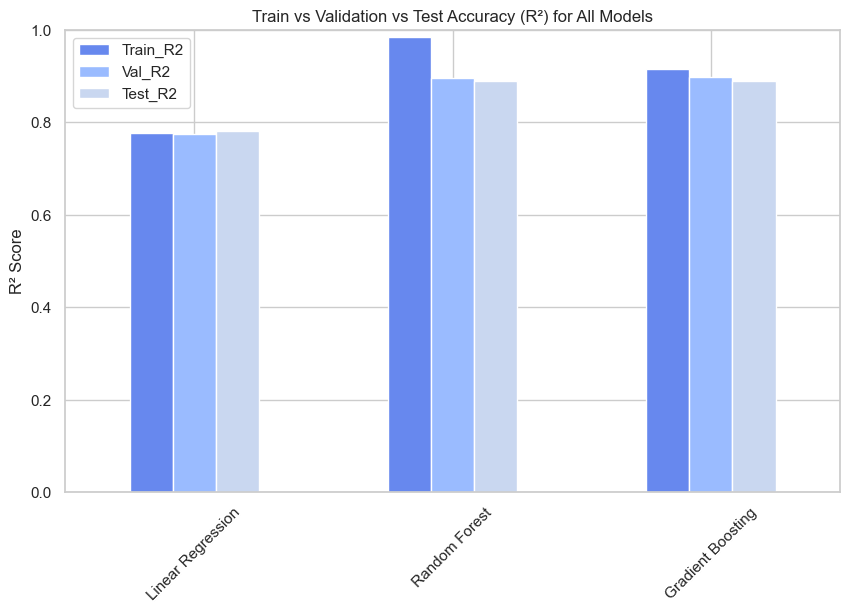

In [16]:
# Combined R² comparison for Train, Validation, Test
plt.figure(figsize=(10,6))
results_df[["Train_R2","Val_R2","Test_R2"]].plot(kind="bar", figsize=(10,6))
plt.title("Train vs Validation vs Test Accuracy (R²) for All Models")
plt.ylabel("R² Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()


# Section 6: Hyperparameter Tuning (Best Model = Gradient Boosting)

We already saw Gradient Boosting performs balanced and accurate, so now we’ll tune its hyperparameters using GridSearchCV.
Since Kaggle can be slow with large grids, I’ll keep it compact but effective.

In [17]:
# Section 6: Hyperparameter Tuning for Gradient Boosting

from sklearn.model_selection import GridSearchCV

# Define model
gb_model = GradientBoostingRegressor(random_state=42)

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10]
}

# Grid Search (3-fold CV on training set)
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

# Fit on TRAIN + VALIDATION combined (not on test yet!)
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

grid_search.fit(X_train_full, y_train_full)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (R²):", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score (R²): 0.9041582935101456


Final Gradient Boosting Test Performance:
R²: 0.9067369735208383
RMSE: 0.16027995380425936


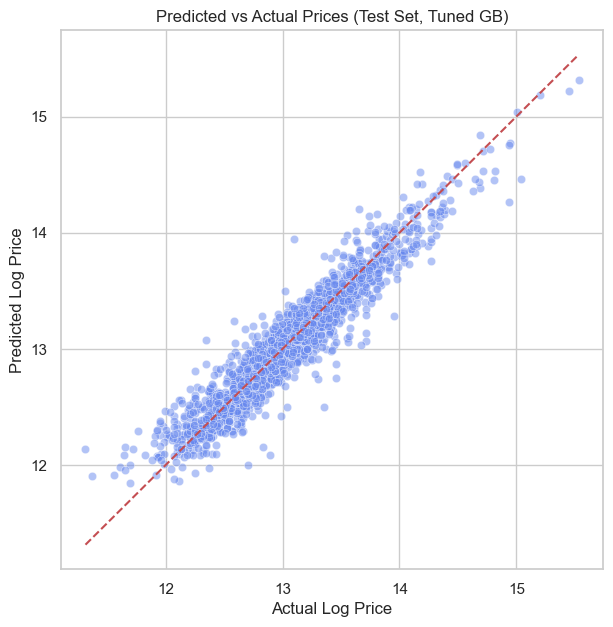

In [18]:
# Get best model
best_gb = grid_search.best_estimator_

# Evaluate on Test set
y_test_pred_best = best_gb.predict(X_test)

r2_test = r2_score(y_test, y_test_pred_best)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_best))

print("Final Gradient Boosting Test Performance:")
print("R²:", r2_test)
print("RMSE:", rmse_test)

# Predicted vs Actual (after tuning)
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_test_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Predicted vs Actual Prices (Test Set, Tuned GB)")
plt.show()


In [19]:
# Section 7: Save the Tuned Model

import joblib

# Save model
joblib.dump(best_gb, "house_price_model.pkl")
print("✅ Model saved as house_price_model.pkl")

# Later you can reload it like this:
# model = joblib.load("house_price_model.pkl")


✅ Model saved as house_price_model.pkl


In [23]:
import ipywidgets as widgets
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import joblib

# Load model (if not already loaded)
best_gb = joblib.load("house_price_model.pkl")

# Output box for displaying results
out = widgets.Output()

def on_button_clicked(b):
    out.clear_output()  # clear previous result
    with out:
        # Build input data
        input_data = pd.DataFrame({
            "number of bedrooms": [bedrooms.value],
            "number of bathrooms": [bathrooms.value],
            "living area": [living_area.value],
            "lot area": [lot_area.value],
            "number of floors": [floors.value],
            "condition of the house": [condition.value],
            "grade of the house": [grade.value],
            "Number of schools nearby": [schools.value],
            "Distance from the airport": [distance_airport.value],

            # Hidden defaults for unused features
            "Area of the basement": [500],
            "Area of the house(excluding basement)": [2000],
            "Lattitude": [47.6],
            "Longitude": [-122.3],
            "house_age": [20],
            "living_area_renov": [2000],
            "lot_area_renov": [5000],
            "number of views": [0],
            "renovated": [0],
            "waterfront present": [0]
        })

        # Ensure correct order
        input_data = input_data[best_gb.feature_names_in_]

        # Prediction
        prediction_log = best_gb.predict(input_data)[0]
        price = round(np.expm1(prediction_log), 2)

        # Category
        if price < 500000:
            category, color = "Cheap", "lightgreen"
        elif 500000 <= price < 1500000:
            category, color = "Moderate", "lightblue"
        else:
            category, color = "Luxury", "lightcoral"

        # Styled output
        display(HTML(f"""
            <div style="padding:15px; background-color:{color}; 
                        border-radius:10px; text-align:center; font-size:18px; font-weight:bold;">
                🏠 Predicted House Price: ₹ {price:,.0f}<br>
                💡 Category: {category}
            </div>
        """))

# Define widgets
bedrooms = widgets.IntSlider(value=3, min=1, max=10, description="Bedrooms")
bathrooms = widgets.FloatSlider(value=2.0, min=1.0, max=8.0, step=0.5, description="Bathrooms")
living_area = widgets.IntSlider(value=2000, min=500, max=10000, step=100, description="Living Area")
lot_area = widgets.IntSlider(value=5000, min=500, max=100000, step=500, description="Lot Area")
floors = widgets.IntSlider(value=2, min=1, max=3, description="Floors")
condition = widgets.IntSlider(value=3, min=1, max=5, description="Condition")
grade = widgets.IntSlider(value=7, min=1, max=13, description="Grade")
schools = widgets.IntSlider(value=2, min=0, max=10, description="Schools Nearby")
distance_airport = widgets.IntSlider(value=25, min=1, max=80, description="Distance Airport")

button = widgets.Button(description="Predict Price", button_style="success")
button.on_click(on_button_clicked)

# Display UI + Output box
display(bedrooms, bathrooms, living_area, lot_area, floors, condition, grade, schools, distance_airport, button, out)


IntSlider(value=3, description='Bedrooms', max=10, min=1)

FloatSlider(value=2.0, description='Bathrooms', max=8.0, min=1.0, step=0.5)

IntSlider(value=2000, description='Living Area', max=10000, min=500, step=100)

IntSlider(value=5000, description='Lot Area', max=100000, min=500, step=500)

IntSlider(value=2, description='Floors', max=3, min=1)

IntSlider(value=3, description='Condition', max=5, min=1)

IntSlider(value=7, description='Grade', max=13, min=1)

IntSlider(value=2, description='Schools Nearby', max=10)

IntSlider(value=25, description='Distance Airport', max=80, min=1)

Button(button_style='success', description='Predict Price', style=ButtonStyle())

Output()